## Imports

In [86]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True)

In [26]:
# enable Chinese characters in matplotlib
from matplotlib import font_manager

fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
fontP.set_size(14)

## Describing Data

The dataset is retrieved at April 10, 2017 from [bilibili.com](http://www.bilibili.com/) that describes the information of all videos of [Virgoo Team](http://space.bilibili.com/16693558/#!/video), including: 
- aid
- title
- url
- date
- time
- length
- play
- danmaku (a number)
- review
- favorites
- coin

Let's begin

In [2]:
d = pd.read_csv('VirgooTeam_Videos.csv', index_col=0)
d.head()

,aid,title,url,date,time,length,play,danmaku,review,favorites,coin
0,9719223,[喂狗组]《尼尔:机械纪元》VH难度 手撕亚当,http://www.bilibili.com/video/av9719223,2017-04-09,02:07:59,09:46,15834,244,130,180,330
1,9709649,[喂狗组]拳皇14DLC人物 洛克霍华德 连续技,http://www.bilibili.com/video/av9709649,2017-04-08,15:32:10,01:26,9308,52,79,31,208
2,9667348,[喂狗组] 黑暗之魂3 DLC2 黑龙邪道100%成功方法教学,http://www.bilibili.com/video/av9667348,2017-04-07,02:44:02,05:43,20618,216,191,180,785
3,9564681,[喂狗组]《尼尔:机械纪元》最高难度通关攻略2,http://www.bilibili.com/video/av9564681,2017-04-02,13:17:01,37:44,10801,187,120,139,300
4,9477430,[喂狗组]黑魂3环之都 手撕老贼,http://www.bilibili.com/video/av9477430,2017-03-30,01:31:35,12:27,19963,245,117,71,513


In [3]:
d.describe()

,aid,play,danmaku,review,favorites,coin
count,1.040000e+02,104.000000,104.000000,104.000000,104.000000,104.000000
mean,6.709055e+06,27985.153846,693.413462,114.769231,402.826923,651.923077
std,1.681868e+06,63858.340490,982.399160,218.822455,1447.540763,1412.906092
min,3.895109e+06,1699.000000,12.000000,5.000000,14.000000,11.000000
25%,5.201167e+06,7995.750000,149.500000,44.500000,54.750000,167.500000
50%,6.656832e+06,13887.500000,462.500000,72.500000,93.000000,415.500000
75%,7.677858e+06,26129.500000,932.500000,117.750000,236.000000,637.250000
max,9.719223e+06,602971.000000,7634.000000,2127.000000,13598.000000,13063.000000


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 11 columns):
aid          104 non-null int64
title        104 non-null object
url          104 non-null object
date         104 non-null object
time         104 non-null object
length       104 non-null object
play         104 non-null int64
danmaku      104 non-null int64
review       104 non-null int64
favorites    104 non-null int64
coin         104 non-null int64
dtypes: int64(6), object(5)
memory usage: 9.8+ KB


*no missing value*

### Data Cleaning

#### Combine date & time

And change the time from EST to UTC+08:00 (Chinese time) so that the datetime reflects actual time when Virgoo Team released the videos. And easier to do calculations.

In [5]:
d['datetime'] = d['date'] + ' ' + d['time']
d.head()

,aid,title,url,date,time,length,play,danmaku,review,favorites,coin,datetime
0,9719223,[喂狗组]《尼尔:机械纪元》VH难度 手撕亚当,http://www.bilibili.com/video/av9719223,2017-04-09,02:07:59,09:46,15834,244,130,180,330,2017-04-09 02:07:59
1,9709649,[喂狗组]拳皇14DLC人物 洛克霍华德 连续技,http://www.bilibili.com/video/av9709649,2017-04-08,15:32:10,01:26,9308,52,79,31,208,2017-04-08 15:32:10
2,9667348,[喂狗组] 黑暗之魂3 DLC2 黑龙邪道100%成功方法教学,http://www.bilibili.com/video/av9667348,2017-04-07,02:44:02,05:43,20618,216,191,180,785,2017-04-07 02:44:02
3,9564681,[喂狗组]《尼尔:机械纪元》最高难度通关攻略2,http://www.bilibili.com/video/av9564681,2017-04-02,13:17:01,37:44,10801,187,120,139,300,2017-04-02 13:17:01
4,9477430,[喂狗组]黑魂3环之都 手撕老贼,http://www.bilibili.com/video/av9477430,2017-03-30,01:31:35,12:27,19963,245,117,71,513,2017-03-30 01:31:35


In [6]:
d = d.drop(['date', 'time'],1)
d.head()

,aid,title,url,length,play,danmaku,review,favorites,coin,datetime
0,9719223,[喂狗组]《尼尔:机械纪元》VH难度 手撕亚当,http://www.bilibili.com/video/av9719223,09:46,15834,244,130,180,330,2017-04-09 02:07:59
1,9709649,[喂狗组]拳皇14DLC人物 洛克霍华德 连续技,http://www.bilibili.com/video/av9709649,01:26,9308,52,79,31,208,2017-04-08 15:32:10
2,9667348,[喂狗组] 黑暗之魂3 DLC2 黑龙邪道100%成功方法教学,http://www.bilibili.com/video/av9667348,05:43,20618,216,191,180,785,2017-04-07 02:44:02
3,9564681,[喂狗组]《尼尔:机械纪元》最高难度通关攻略2,http://www.bilibili.com/video/av9564681,37:44,10801,187,120,139,300,2017-04-02 13:17:01
4,9477430,[喂狗组]黑魂3环之都 手撕老贼,http://www.bilibili.com/video/av9477430,12:27,19963,245,117,71,513,2017-03-30 01:31:35


In [7]:
d['datetime'] = pd.to_datetime(d['datetime'])
d.head()

,aid,title,url,length,play,danmaku,review,favorites,coin,datetime
0,9719223,[喂狗组]《尼尔:机械纪元》VH难度 手撕亚当,http://www.bilibili.com/video/av9719223,09:46,15834,244,130,180,330,2017-04-09 02:07:59
1,9709649,[喂狗组]拳皇14DLC人物 洛克霍华德 连续技,http://www.bilibili.com/video/av9709649,01:26,9308,52,79,31,208,2017-04-08 15:32:10
2,9667348,[喂狗组] 黑暗之魂3 DLC2 黑龙邪道100%成功方法教学,http://www.bilibili.com/video/av9667348,05:43,20618,216,191,180,785,2017-04-07 02:44:02
3,9564681,[喂狗组]《尼尔:机械纪元》最高难度通关攻略2,http://www.bilibili.com/video/av9564681,37:44,10801,187,120,139,300,2017-04-02 13:17:01
4,9477430,[喂狗组]黑魂3环之都 手撕老贼,http://www.bilibili.com/video/av9477430,12:27,19963,245,117,71,513,2017-03-30 01:31:35


In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 10 columns):
aid          104 non-null int64
title        104 non-null object
url          104 non-null object
length       104 non-null object
play         104 non-null int64
danmaku      104 non-null int64
review       104 non-null int64
favorites    104 non-null int64
coin         104 non-null int64
datetime     104 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 8.9+ KB


In [9]:
pd.Timedelta('12 hours')

Timedelta('0 days 12:00:00')

In [10]:
d['datetime'] = d['datetime'] + pd.Timedelta('12 hours')
d.head()

,aid,title,url,length,play,danmaku,review,favorites,coin,datetime
0,9719223,[喂狗组]《尼尔:机械纪元》VH难度 手撕亚当,http://www.bilibili.com/video/av9719223,09:46,15834,244,130,180,330,2017-04-09 14:07:59
1,9709649,[喂狗组]拳皇14DLC人物 洛克霍华德 连续技,http://www.bilibili.com/video/av9709649,01:26,9308,52,79,31,208,2017-04-09 03:32:10
2,9667348,[喂狗组] 黑暗之魂3 DLC2 黑龙邪道100%成功方法教学,http://www.bilibili.com/video/av9667348,05:43,20618,216,191,180,785,2017-04-07 14:44:02
3,9564681,[喂狗组]《尼尔:机械纪元》最高难度通关攻略2,http://www.bilibili.com/video/av9564681,37:44,10801,187,120,139,300,2017-04-03 01:17:01
4,9477430,[喂狗组]黑魂3环之都 手撕老贼,http://www.bilibili.com/video/av9477430,12:27,19963,245,117,71,513,2017-03-30 13:31:35


*This is the exact time we want*

#### Convert length to seconds (s)

In [11]:
for i in range(len(d.length)):
    value = d.length[i]
    value_second = int(value.split(':')[-1]) + int(value.split(':')[-2])*60
    d.length.set_value(i, value_second)
d['length'] = d['length'].astype(int)
d.head()

,aid,title,url,length,play,danmaku,review,favorites,coin,datetime
0,9719223,[喂狗组]《尼尔:机械纪元》VH难度 手撕亚当,http://www.bilibili.com/video/av9719223,586,15834,244,130,180,330,2017-04-09 14:07:59
1,9709649,[喂狗组]拳皇14DLC人物 洛克霍华德 连续技,http://www.bilibili.com/video/av9709649,86,9308,52,79,31,208,2017-04-09 03:32:10
2,9667348,[喂狗组] 黑暗之魂3 DLC2 黑龙邪道100%成功方法教学,http://www.bilibili.com/video/av9667348,343,20618,216,191,180,785,2017-04-07 14:44:02
3,9564681,[喂狗组]《尼尔:机械纪元》最高难度通关攻略2,http://www.bilibili.com/video/av9564681,2264,10801,187,120,139,300,2017-04-03 01:17:01
4,9477430,[喂狗组]黑魂3环之都 手撕老贼,http://www.bilibili.com/video/av9477430,747,19963,245,117,71,513,2017-03-30 13:31:35


#### Convert 'aid' to str

In [12]:
d['aid'] = d['aid'].astype(str)
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 10 columns):
aid          104 non-null object
title        104 non-null object
url          104 non-null object
length       104 non-null int32
play         104 non-null int64
danmaku      104 non-null int64
review       104 non-null int64
favorites    104 non-null int64
coin         104 non-null int64
datetime     104 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(5), object(3)
memory usage: 8.5+ KB


## Exploratory Data Visualization

### Heatmap

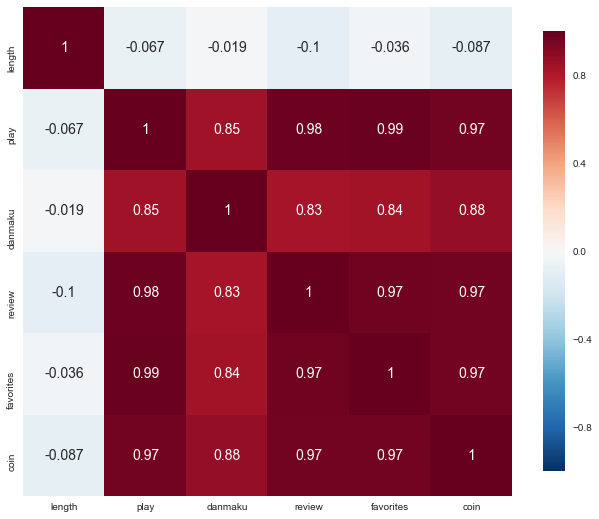

In [13]:
_, ax = plt.subplots(figsize =(11,9))
sns.heatmap(d.corr(), vmax=1, 
            annot=True, annot_kws = {'fontsize': 14}, 
            cbar_kws={ 'shrink' : 0.9 },
            square=True, 
            ax=ax)

It seems that all quantitative measurements are inter-related with each other, except 'length'.

### Distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029DD27B8CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000029DD2677978>]], dtype=object)

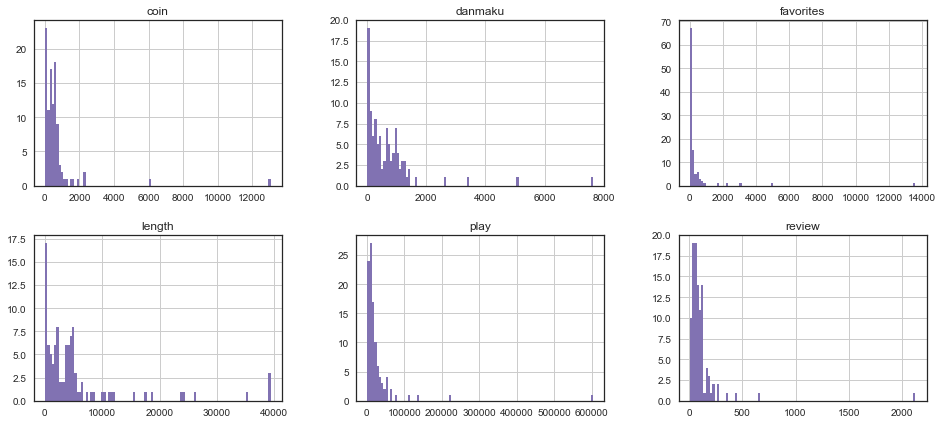

In [14]:
d.hist(color='m', bins=100, layout=(2,3), figsize=(16,7))

(array([ 24.,  27.,  17.,  10.,   6.,   4.,   3.,   2.,   4.,   0.,   2.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   1699.  ,    7711.72,   13724.44,   19737.16,   25749.88,
          31762.6 ,   37775.32,   43788.04,   49800.76,   55813.48,
          61826.2 ,   67838.92,   73851.64,   79864.36,   85877.08,
          91889.8 ,   97902.52,  103915.24,  109927.96,  115940.68,
         121953.4 ,  127966.12,  133978.84,  1

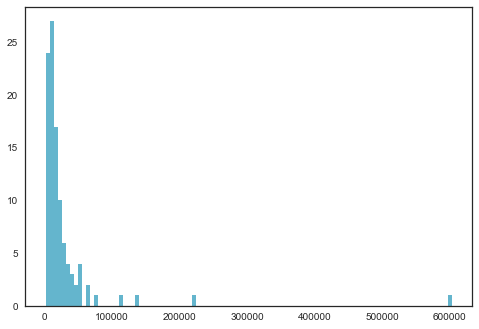

In [15]:
plt.hist(d['play'], bins=100, facecolor='c')

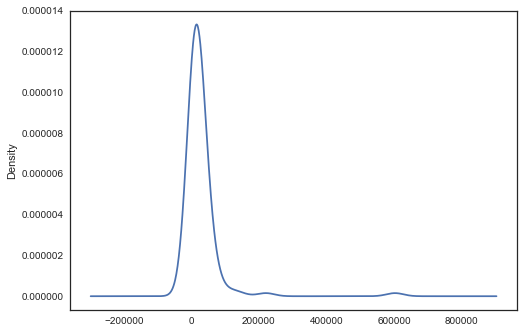

In [16]:
d['play'].plot(kind='kde')

### Length & others

#### Length & Play

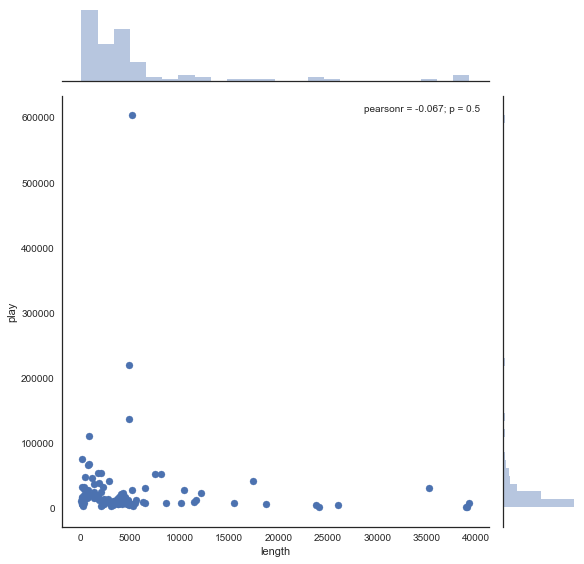

In [17]:
sns.jointplot(data=d, x='length', y='play', size=8)

#### Length & Danmaku

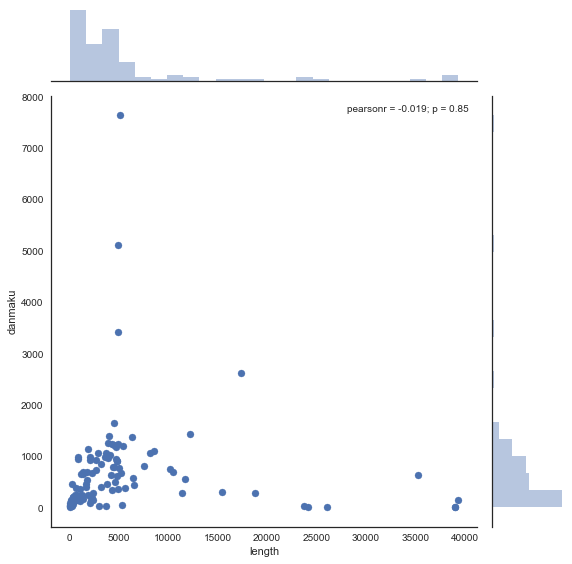

In [18]:
sns.jointplot(data=d, x='length', y='danmaku', size=8)

VirgooTeam's videos sure have more viewers if they keep 'em short.

### Timeseries

#### using seaborn
doesn't work

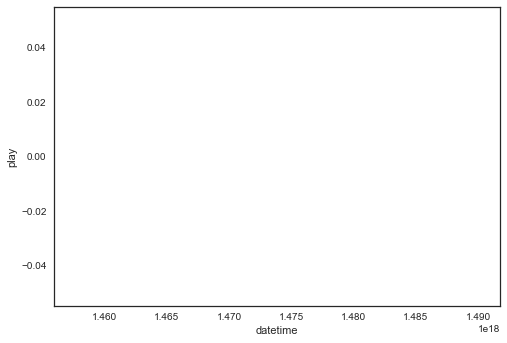

In [19]:
sns.tsplot(data=d, time="datetime", value="play")

#### using plt
works

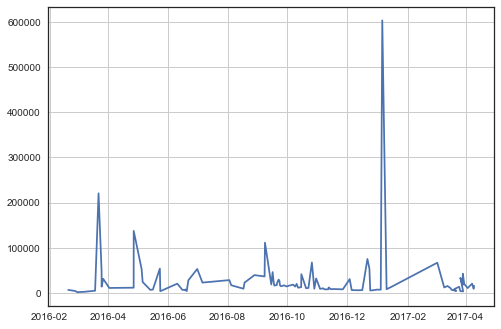

In [20]:
plt.plot(d.datetime, d.play)
plt.grid()

This gives us an intuition, how about the recent 30 videos?

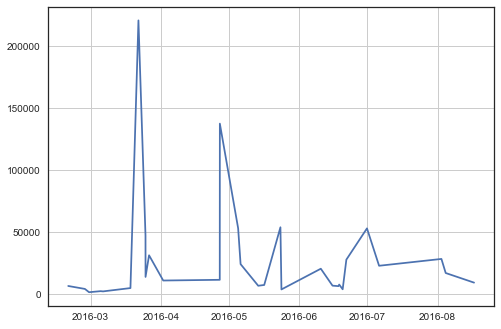

In [21]:
plt.plot(d.datetime[-30:], d.play[-30:])
plt.grid()

### Play of videos

#### all videos

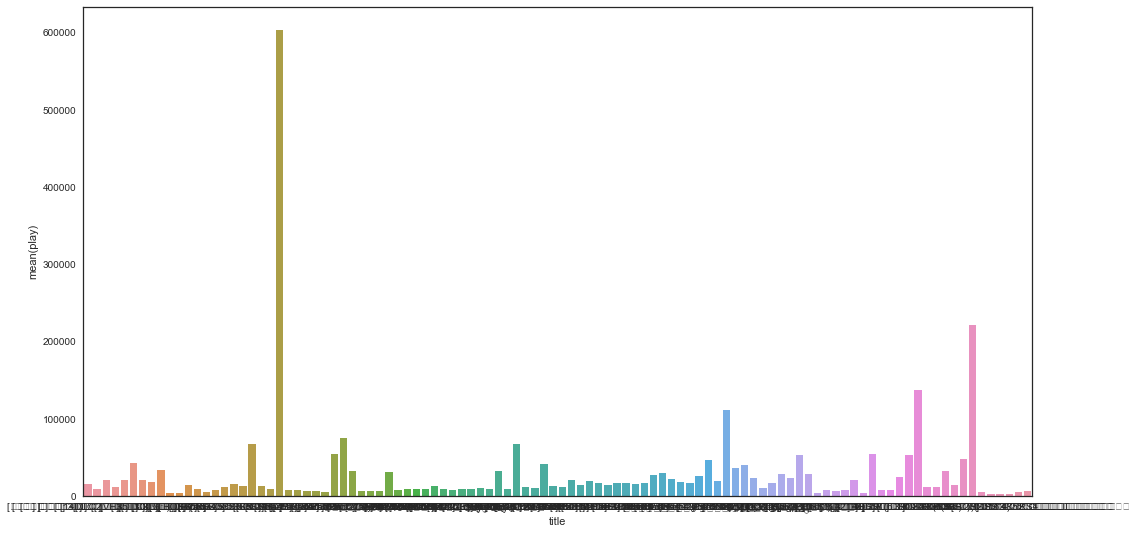

In [22]:
_, ax = plt.subplots(figsize =(17,9))
sns.barplot(x='title', y='play', data=d)

#### top 10 most played videos
Doesn't show Chinese titles

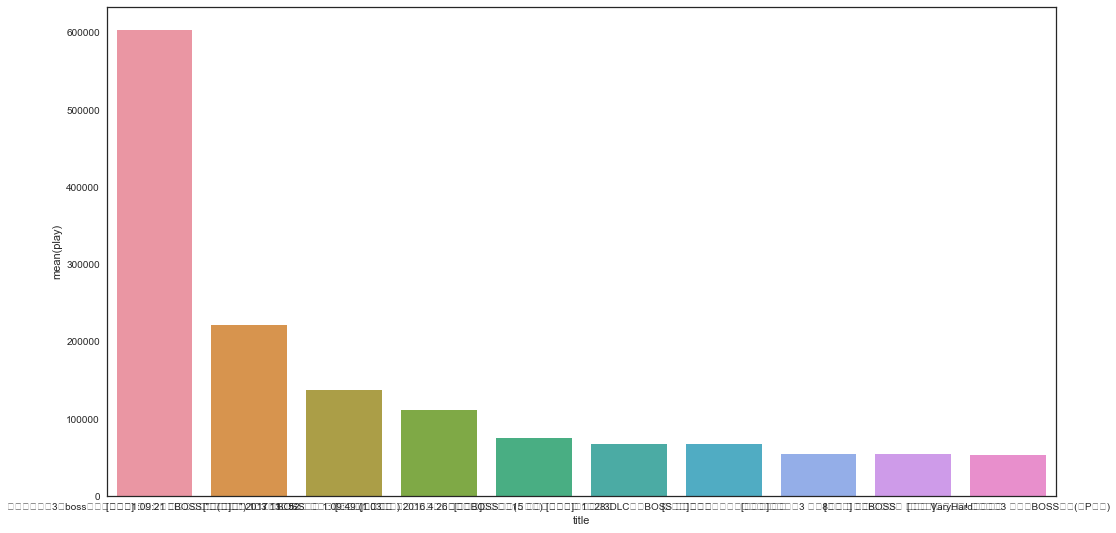

In [25]:
_, ax = plt.subplots(figsize =(17,9))
sns.barplot(x='title', y='play', data=d.sort_values(by='play', ascending=False)[:10])

__终于显示中文了！！！__

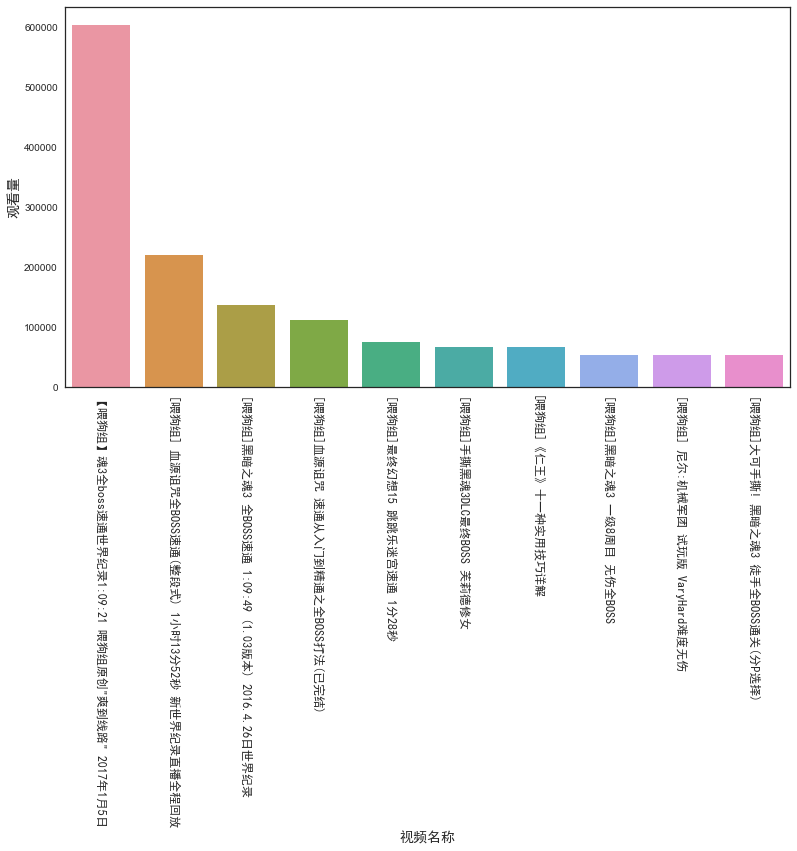

In [55]:
_, ax = plt.subplots(figsize =(13,7))
sns.barplot(x='title', y='play', data=d.sort_values(by='play', ascending=False)[:10])
# magic
plt.xticks(rotation=270, fontProperties=fontP, fontSize=12)
plt.xlabel('视频名称', fontProperties=fontP)
plt.ylabel('观看量', fontProperties=fontP)

##### add 'coin' to a secondary y-axis

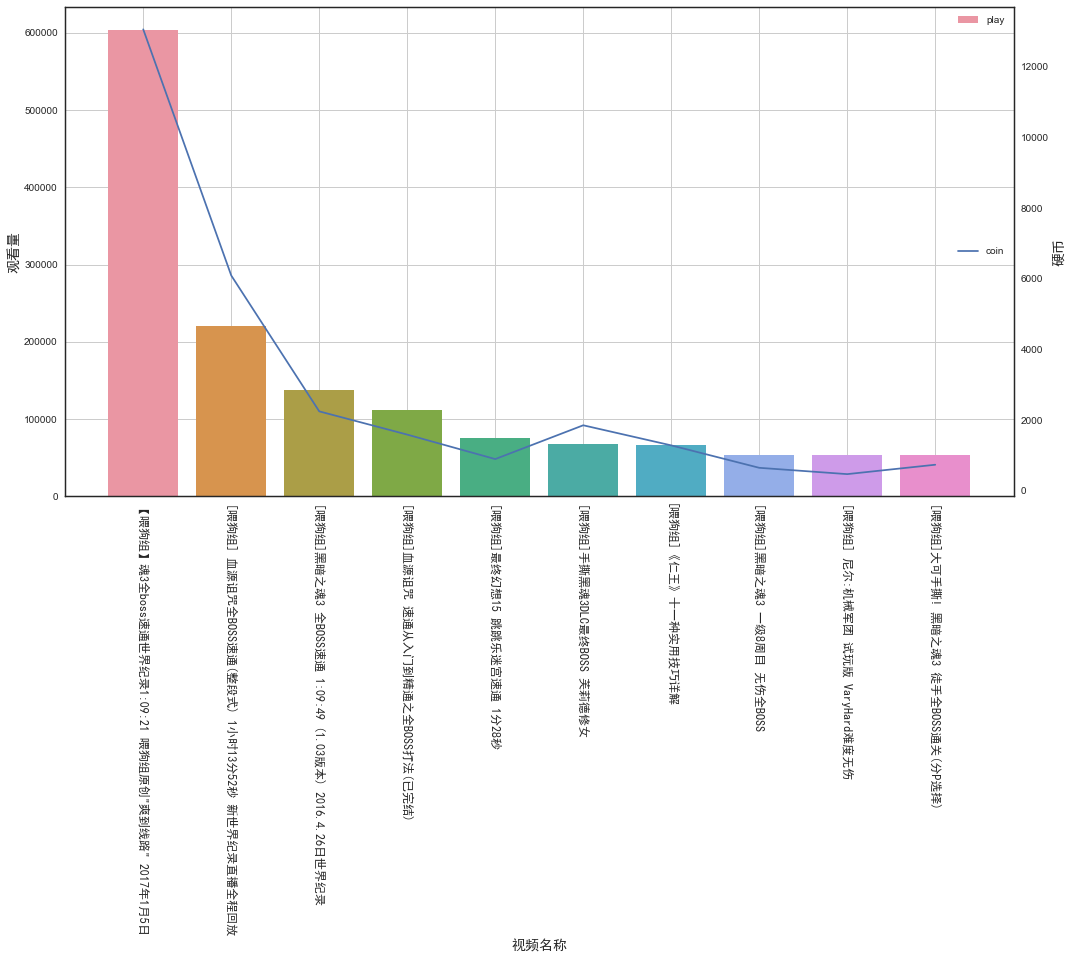

In [139]:
_, ax = plt.subplots(figsize =(17,9))
sns.barplot(x='title', y='play', data=d.sort_values(by='play', ascending=False)[:10], label='play')
# magic
plt.xticks(rotation=270, fontProperties=fontP, fontSize=12)
plt.xlabel('视频名称', fontProperties=fontP)
plt.ylabel('观看量', fontProperties=fontP)
ax.legend(loc=0)
plt.grid()
# 2nd yAxis
ax2 = ax.twinx()
ax2.plot(d.sort_values(by='play', ascending=False)['coin'][:10].tolist(), '-b', label='coin')
ax2.set_ylabel('硬币', fontProperties=fontP)
ax2.legend(loc=5)

##### Pie Chart

Explaination:
- explode: make the one stand out by passing 0.1
- autopct: show ratio?
- textprops: enable 中文
- plt.axis('equal'): draw a circle

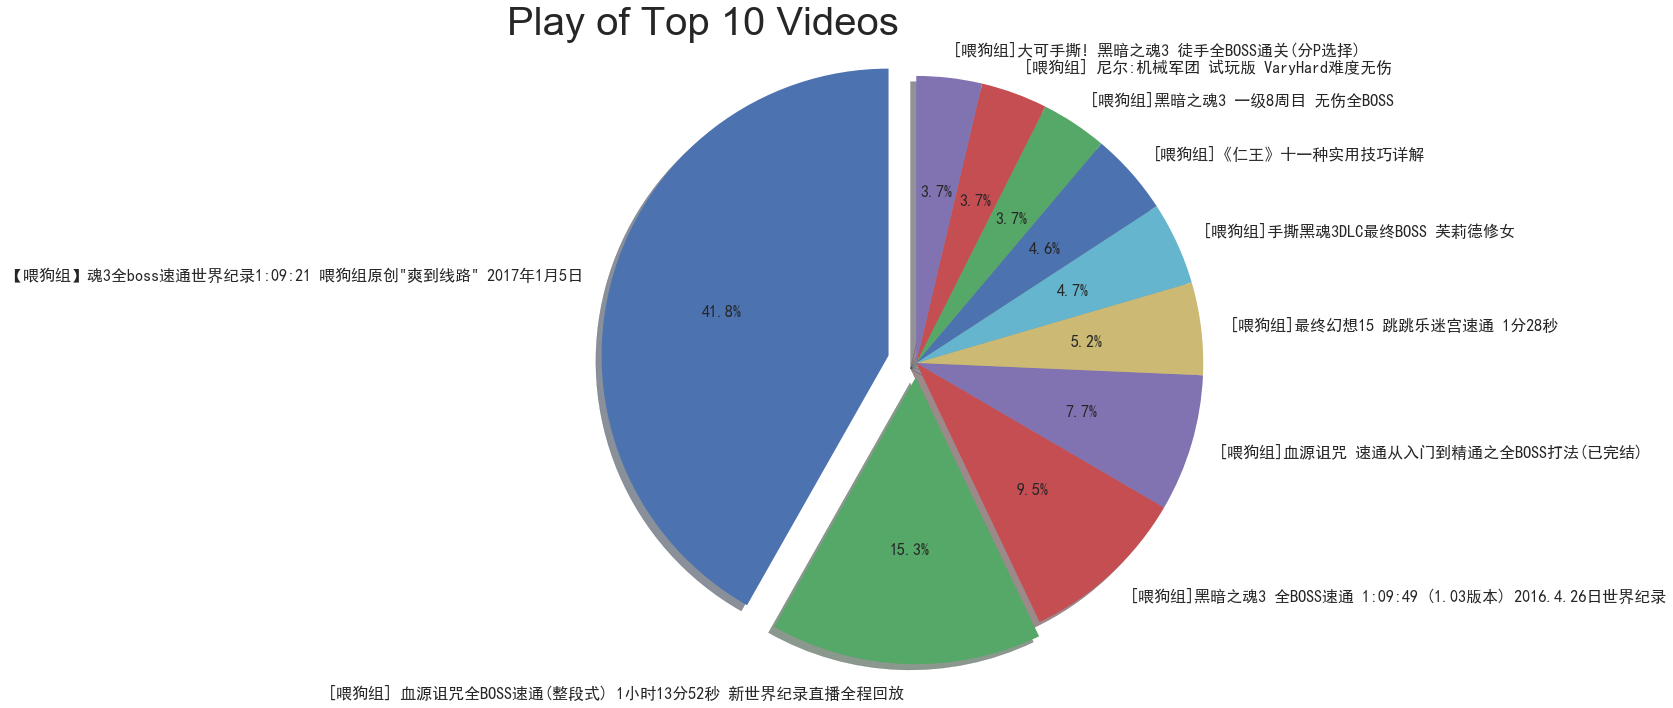

In [84]:
_, ax = plt.subplots(figsize =(12,12))
plt.pie(d.sort_values(by='play', ascending=False)['play'][:10], explode=[0.1,0.05,0,0,0,0,0,0,0,0], labels=d.sort_values(by='play', ascending=False)['title'][:10], autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontProperties': fontP, 'fontSize': 16})
plt.axis('equal')
plt.title('Play of Top 10 Videos', fontSize=40, horizontalalignment='right') # I don't know why it's 'right'

#### Pandas built-in plotting is also great, but it doesb't show titles, either

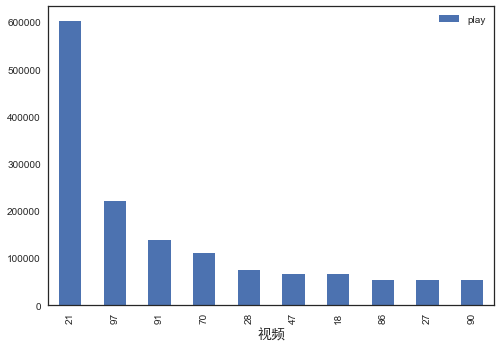

In [28]:
d[['title','play']].sort_values(by='play', ascending=False)[:10].plot.bar()
plt.xlabel('视频', fontProperties=fontP) # magic

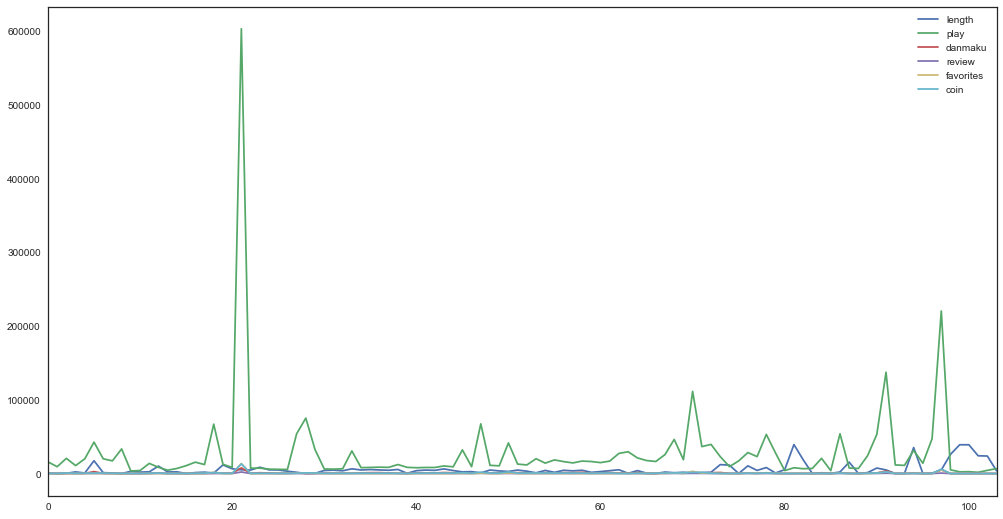

In [37]:
d.plot(figsize =(17,9))

#### Play & Danmaku on 2nd yAxis

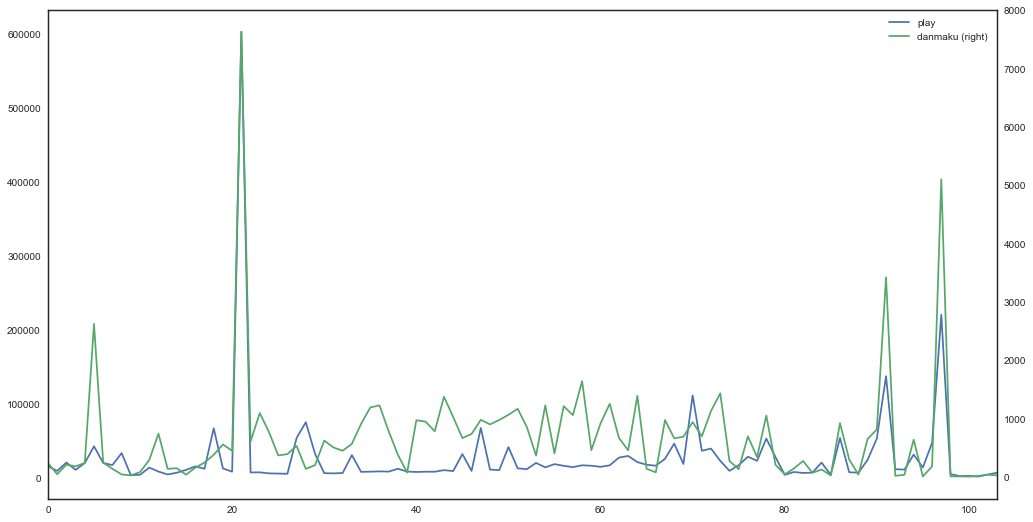

In [38]:
d.play.plot(legend=True, figsize=(17,9))
d.danmaku.plot(secondary_y=True, style='g', legend=True)

## Scratch Paper

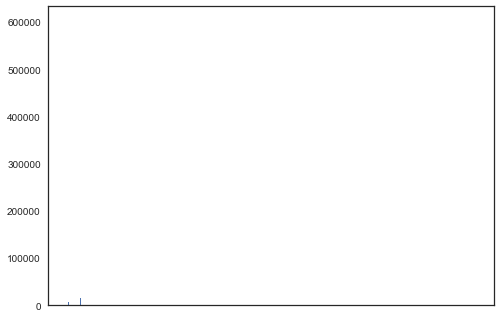

In [41]:
fig, ax = plt.subplots()

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
plt.bar(d.coin, d.play)
labels = [d[['title','play']].sort_values(by='play', ascending=False)['title'][:10].tolist()]

ax.set_xticklabels(labels, fontProperties=fontP)
plt.xticks(rotation=45)
plt.show()


In [68]:
labels = d[['title','play']].sort_values(by='play', ascending=False)['title'][:10].tolist()
lebels = [x.encode('utf-8') for x in labels]

In [46]:
d.sort_values(by='play', ascending=False)[:10]

,aid,title,url,length,play,danmaku,review,favorites,coin,datetime
21,7867760,"【喂狗组】魂3全boss速通世界纪录1:09:21 喂狗组原创""爽到线路"" 2017年1月5日",http://www.bilibili.com/video/av7867760,5130,602971,7634,2127,13598,13063,2017-01-05 20:26:59
97,4158511,[喂狗组] 血源诅咒全BOSS速通(整段式) 1小时13分52秒 新世界纪录直播全程回放,http://www.bilibili.com/video/av4158511,4860,220427,5105,661,4934,6094,2016-03-22 01:53:58
91,4479840,[喂狗组]黑暗之魂3 全BOSS速通 1:09:49 (1.03版本) 2016.4.26日...,http://www.bilibili.com/video/av4479840,4920,137381,3427,445,2234,2247,2016-04-26 23:31:25
70,6195569,[喂狗组]血源诅咒 速通从入门到精通之全BOSS打法(已完结),http://www.bilibili.com/video/av6195569,853,111392,946,276,3073,1589,2016-09-08 00:59:05
28,7629604,[喂狗组]最终幻想15 跳跳乐迷宫速通 1分28秒,http://www.bilibili.com/video/av7629604,109,75190,143,205,686,896,2016-12-21 16:20:17
47,6826838,[喂狗组]手撕黑魂3DLC最终BOSS 芙莉德修女,http://www.bilibili.com/video/av6826838,859,67421,984,354,441,1853,2016-10-25 23:02:19
18,8930354,[喂狗组]《仁王》十一种实用技巧详解,http://www.bilibili.com/video/av8930354,678,66973,386,232,1758,1284,2017-03-03 00:47:31
86,4743342,[喂狗组]黑暗之魂3 一级8周目 无伤全BOSS,http://www.bilibili.com/video/av4743342,2080,53967,928,128,498,649,2016-05-23 16:42:15
27,7658200,[喂狗组] 尼尔:机械军团 试玩版 VaryHard难度无伤,http://www.bilibili.com/video/av7658200,1706,53887,537,195,521,470,2016-12-23 16:54:40
90,4559977,[喂狗组]大可手撕! 黑暗之魂3 徒手全BOSS通关(分P选择),http://www.bilibili.com/video/av4559977,7488,53163,818,129,701,736,2016-05-05 01:02:28
